In [1]:
%run C:/Users/a/apython/__init__/Normal_for_DSS.py

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [2]:
from IPython.core.display import display
from PIL import Image, ImageFilter
import math
import matplotlib.pyplot as plt
import numpy as np

from skimage import img_as_float
from skimage.feature import blob_dog
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate


In [3]:
#open, filter, trans to float!! image by PIL.Image!!
a = Image.open('C:/Users/a/GitHub/lines/datas/ellipse.jpg')
a_tr = a.filter(ImageFilter.GaussianBlur)



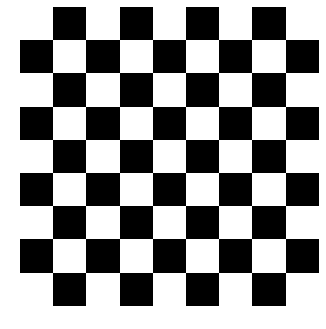

In [9]:
# make checker board!!
check = np.zeros((9,9))
check[::2,1::2] = 1
check[1::2,::2] = 1
a1 = plt.subplot(111)
plt.imshow(check)
a1.set_axis_off()
plt.show()

In [12]:
import skimage

In [13]:
# skimage file in and out!!
from skimage import io
import os

In [140]:
#example for in and out of image!!!!

filename = os.path.join(skimage.data_dir, 'camera.png')
file2 = os.path.join('C:/Users/a/GitHub/lines/datas/po.jpg')
camera = io.imread(filename)
ell = io.imread(file2)
io.imsave("local_ell.png", ell)

In [141]:
# change image to the float!! (can chage to the integer too)
ell_1 = img_as_float(ell)
#to change image to the gray!!!(1,0 something!)
ell_2 = skimage.color.rgb2gray(ell_1)

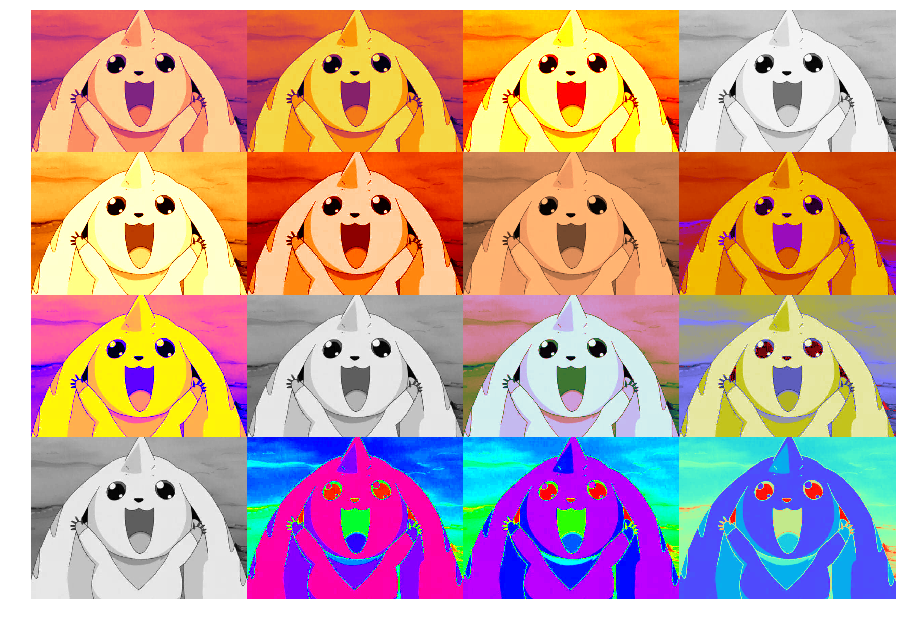

In [142]:
# Print 4*4 matrice for colormap changed!!!!! 

k = ell_2

plt.figure(figsize = (12,12))

a1 = plt.subplot(4,4,1)
plt.imshow(k, cmap = plt.cm.magma)
a1.set_axis_off()


a2 = plt.subplot(4,4,2)
plt.imshow(k, cmap = plt.cm.inferno)
a2.set_axis_off()

a3 = plt.subplot(4,4,3)
plt.imshow(k, cmap = plt.cm.hot)
a3.set_axis_off()

a4 = plt.subplot(4,4,4)
plt.imshow(k, cmap = plt.cm.Greys_r)
a4.set_axis_off()

a5 = plt.subplot(4,4,5)
plt.imshow(k, cmap = plt.cm.afmhot)
a5.set_axis_off()

a6 = plt.subplot(4,4,6)
plt.imshow(k, cmap = plt.cm.gist_heat)
a6.set_axis_off()

a7 = plt.subplot(4,4,7)
plt.imshow(k, cmap = plt.cm.copper)
a7.set_axis_off()

a8 = plt.subplot(4,4,8)
plt.imshow(k, cmap = plt.cm.gnuplot)
a8.set_axis_off()

a9 = plt.subplot(4,4,9)
plt.imshow(k, cmap = plt.cm.gnuplot2)
a9.set_axis_off()

a10 = plt.subplot(4,4,10)
plt.imshow(k, cmap = plt.cm.gist_yarg_r)
a10.set_axis_off()

a11 = plt.subplot(4,4,11)
plt.imshow(k, cmap = plt.cm.cubehelix)
a11.set_axis_off()

a12 = plt.subplot(4,4,12)
plt.imshow(k, cmap = plt.cm.gist_stern)
a12.set_axis_off()

a13 = plt.subplot(4,4,13)
plt.imshow(k, cmap = plt.cm.binary_r)
a13.set_axis_off()

a14 = plt.subplot(4,4,14)
plt.imshow(k, cmap = plt.cm.hsv)
a14.set_axis_off()

a15 = plt.subplot(4,4,15)
plt.imshow(k, cmap = plt.cm.gist_rainbow)
a15.set_axis_off()

a16 = plt.subplot(4,4,16)
plt.imshow(k, cmap = plt.cm.rainbow_r)
a16.set_axis_off()

plt.tight_layout(pad=-1, w_pad = -2, h_pad =-25.5)
plt.show()

In [53]:
#Three kind of flattening method
ell_2.ravel()
np.reshape(ell_2,(np.product(ell_2.shape)))
ell_2.flatten()

array([ 0.82049451,  0.58127882,  0.4597102 , ...,  0.05685137,
        0.06861608,  0.06077294])

In [ ]:
#divide each color`s array(ell_1 is rgb picture)
ell_1[:,:,0].reshape(1,-1)
ell_1[:,:,1].reshape(1,-1)
ell_1[:,:,2].reshape(1,-1)

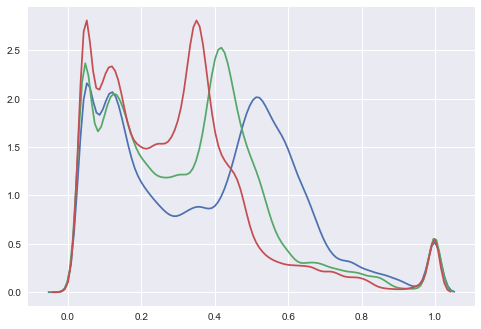

In [87]:
#rgb histogram for~~~
sns.kdeplot(ell_1[:,:,0].reshape(-1))
sns.kdeplot(ell_1[:,:,1].reshape(-1))
sns.kdeplot(ell_1[:,:,2].reshape(-1))
plt.show()

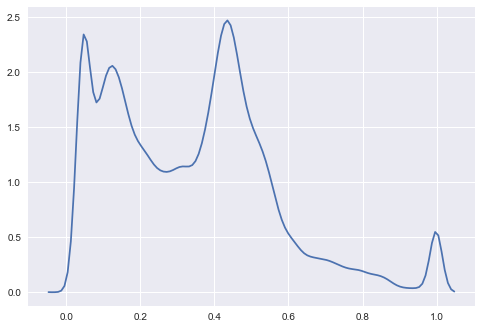

In [88]:
#histogram for gray image!
sns.kdeplot(ell_2.ravel())
plt.show()

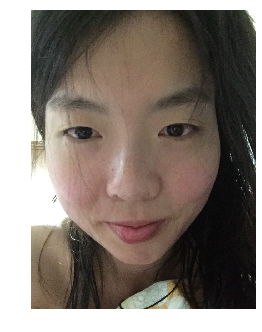

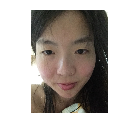

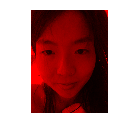

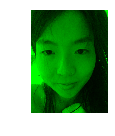

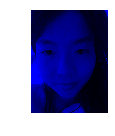

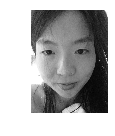

In [128]:
#divide each colors
ell1_ = ell_1[:,:,0]
zeros = np.zeros(ell1_.shape)
ell1_r = np.dstack((ell1_,zeros,zeros))
ell1_g = np.dstack((zeros,ell1_,zeros))
ell1_b = np.dstack((zeros,zeros,ell1_))
ell1_tr

# draw each kind of divided pictures~~
ax = plt.subplot(151)
plt.imshow(ell_1)
ax.set_axis_off()
plt.show()

ax1 = plt.subplot(152)
plt.imshow(ell1_r)
ax1.set_axis_off()
plt.show()

ax2 = plt.subplot(153)
plt.imshow(ell1_g)
ax2.set_axis_off()
plt.show()


ax3 = plt.subplot(154)
plt.imshow(ell1_b)
ax3.set_axis_off()
plt.show()


ax_gr = plt.subplot(155)
plt.imshow(-ell_2)
ax_gr.set_axis_off()
plt.show()

In [205]:
# will do this example!!!

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank


matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf